## LAS vs. DFT

In [1]:
import sys
sys.path.append("../../") 

from tools import bandh
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tools.util import load_pkl, LASdata, PeriodicData, DMRGdata
sns.set()

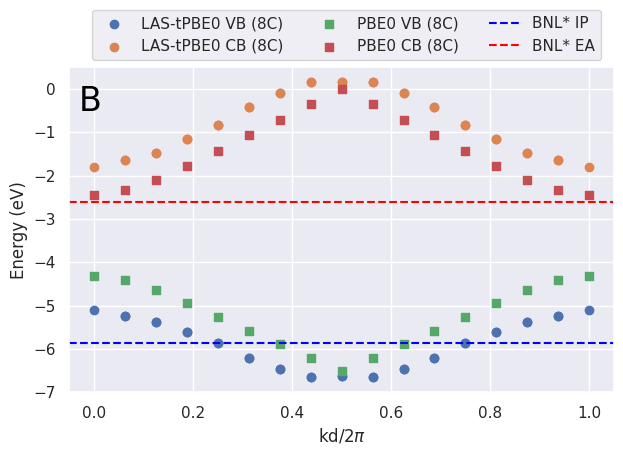

In [2]:
cpf = 4

las = LASdata(pkl_fn=f"pa64_frag{cpf}_dist24_lsipdft.pkl",pct_pdft=0.75)
e,k = las.get_homo()
plt.scatter(k,e,label=f"LAS-tPBE0 VB ({cpf*2}C)")
e,k = las.get_lumo()
plt.scatter(k,e,label=f"LAS-tPBE0 CB ({cpf*2}C)")

fnal = "PBE0"
per = PeriodicData(f"periodic_{fnal}_frag{cpf*2}C_24_k16.csv")
e,k = per.get_homo()
plt.scatter(k,e,label=f"{fnal} VB ({cpf*2}C)",marker="s")
e,k = per.get_lumo()
plt.scatter(k,e,label=f"{fnal} CB ({cpf*2}C)",marker="s")

plt.axhline(-5.87,linestyle="--",color="blue",label="BNL* IP")
plt.axhline(-2.60,linestyle="--",color="red",label="BNL* EA")

plt.ylabel("Energy (eV)")
plt.xlabel("kd/2$\pi$")
plt.legend(bbox_to_anchor=(0.99,1.2),ncols=3)
plt.annotate("B",(-0.03,-0.5),c="black",size=24)
plt.tight_layout()
# plt.savefig("figures/lastpbe0_hse06_comparison.png")